In [3]:
import pandas as pd
import numpy as np

# библиотека для построения графиков
import seaborn as sns
# библиотека с упрощенными графиками
import matplotlib.pyplot as plot

In [4]:
df = pd.read_csv("vgsales_23.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,14378,Hajime no Ippo: The Fighting! (2014),PS3,2014.0,Sports,Namco Bandai Games,0.00,0.00,0.03,0.00,0.03
1,6926,Fallout 3 Game Add-On Pack: Broken Steel and P...,X360,2009.0,Role-Playing,Bethesda Softworks,0.16,0.06,0.00,0.02,0.24
2,3597,Monster High: Ghoul Spirit,Wii,2011.0,Misc,THQ,0.44,0.08,0.00,0.04,0.56
3,6546,Game of Thrones,X360,2012.0,Role-Playing,Focus Home Interactive,0.15,0.08,0.00,0.02,0.26
4,276,FIFA 12,X360,2011.0,Sports,Electronic Arts,0.84,2.79,0.02,0.53,4.19
...,...,...,...,...,...,...,...,...,...,...,...
548,10081,Digimon World DS,DS,2006.0,Role-Playing,Namco Bandai Games,0.10,0.00,0.00,0.01,0.11
549,6708,Sentimental Graffiti,SAT,1998.0,Adventure,NEC Interchannel,0.00,0.00,0.25,0.00,0.25
550,11485,Tomb Raider: Underworld,PC,2008.0,Action,Eidos Interactive,0.00,0.06,0.00,0.02,0.08
551,4524,Wonder Project J: Kikai no Shonen Pino,SNES,1994.0,Simulation,Enix Corporation,0.00,0.00,0.43,0.00,0.43


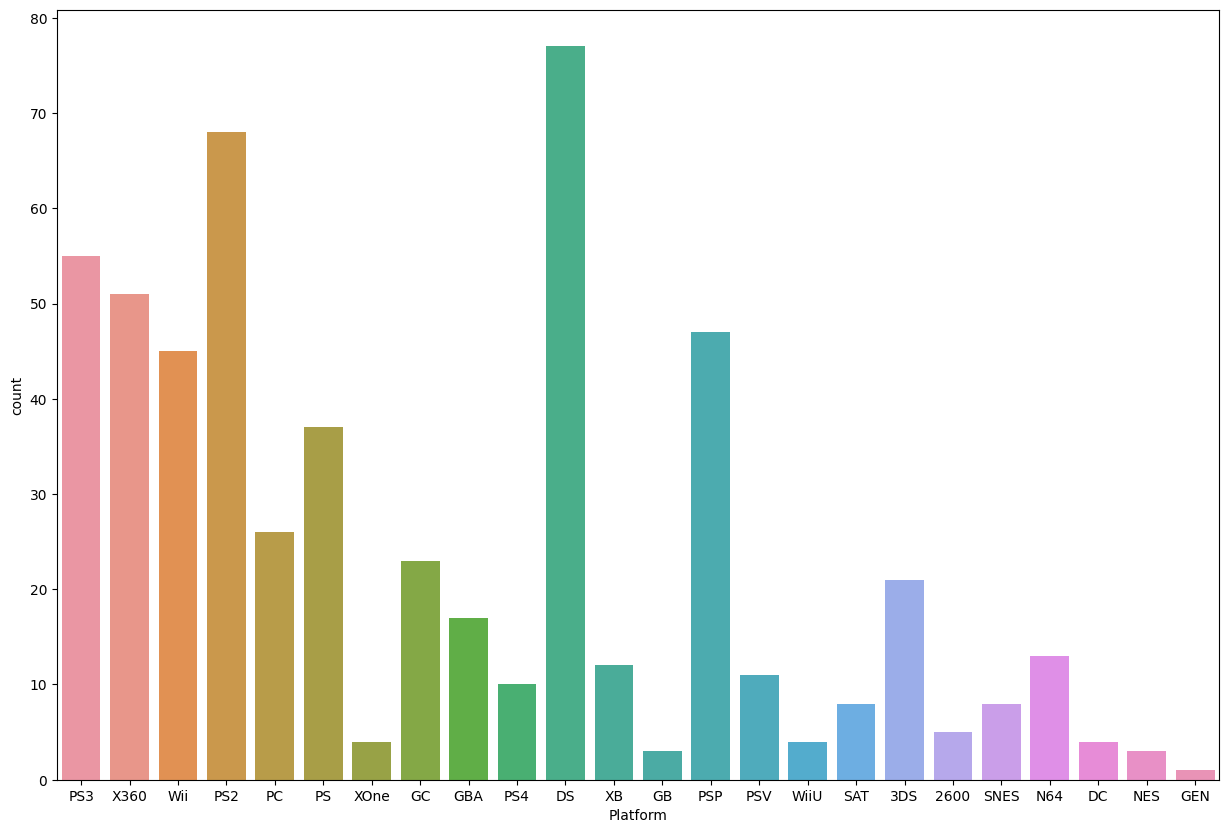

In [5]:
graph = sns.countplot(x="Platform", data = df)
graph.figure.set_figwidth(15)
graph.figure.set_figheight(10)

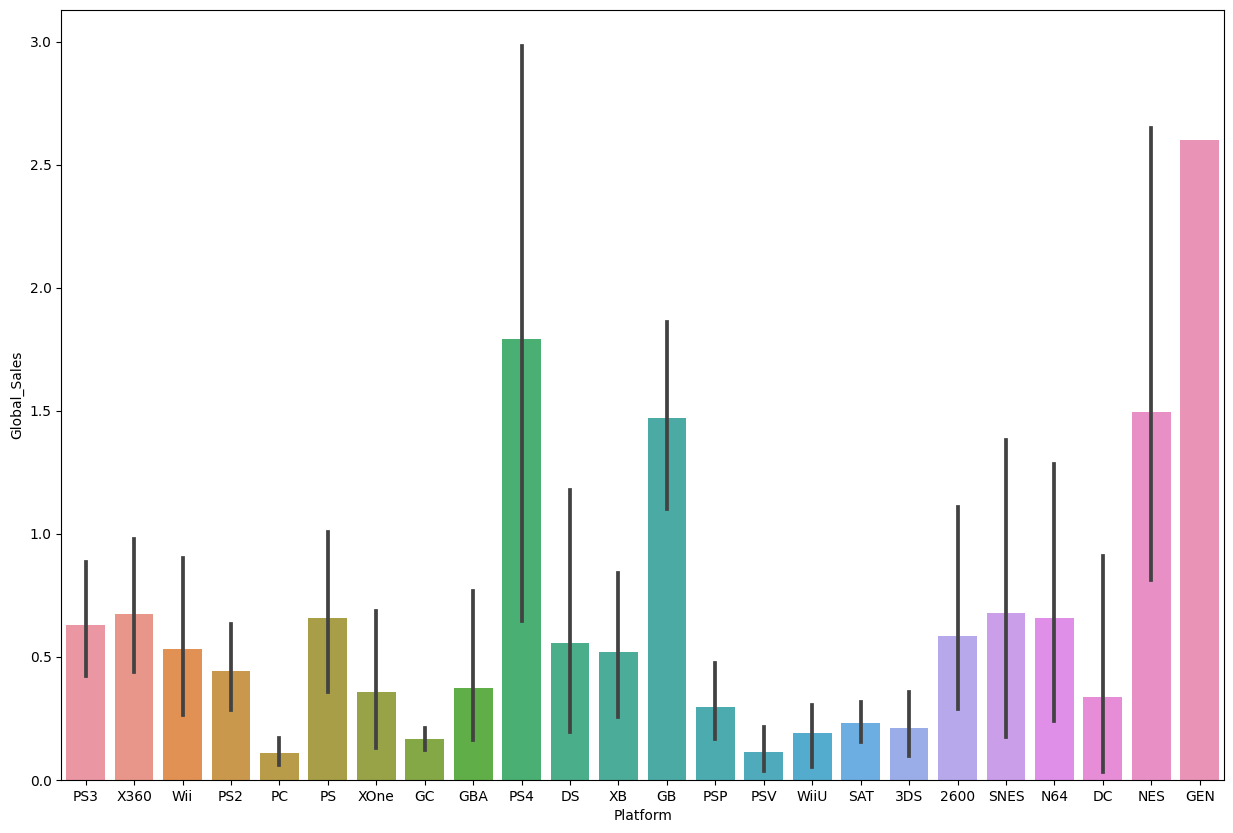

In [6]:
graph = sns.barplot(x=df["Platform"], y=df["Global_Sales"])
graph.figure.set_figwidth(15)
graph.figure.set_figheight(10)

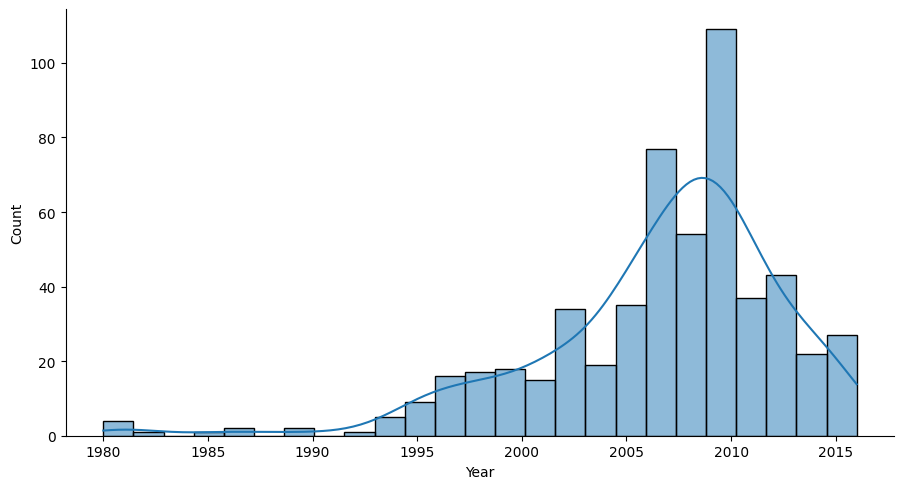

In [7]:
graph = sns.displot(df["Year"], kde = True) 
# kind = "kde", kind = True - аргумент, позволяющий построить отдельный график оценки плотности ядра или 
# kde рисуется в виде линии поверх гистограммы и часто повторяет форму её форму, 
# но дает больше информации о характере распределения.
graph.figure.set_figwidth(10)
graph.figure.set_figheight(5)

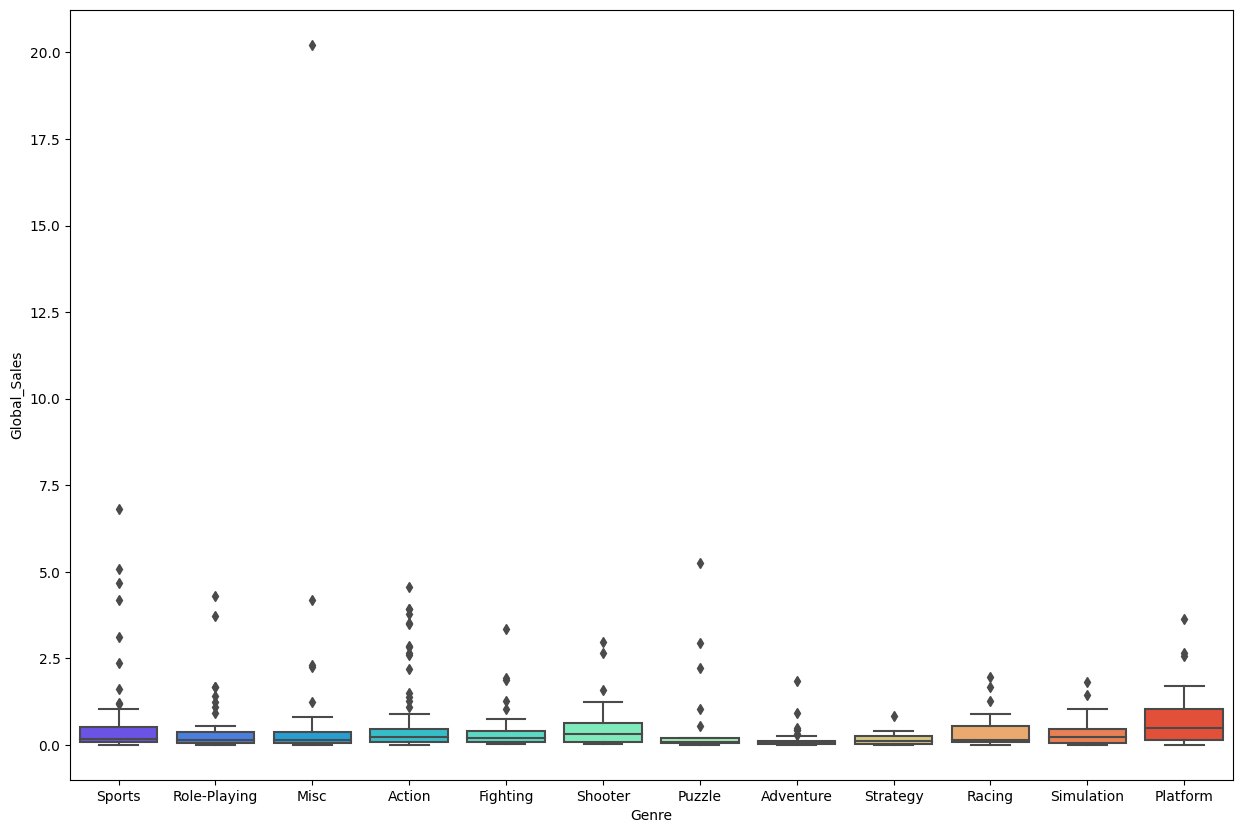

In [8]:
graph = sns.boxplot(x="Genre", y="Global_Sales",data = df,palette='rainbow')
graph.figure.set_figwidth(15)
graph.figure.set_figheight(10) 

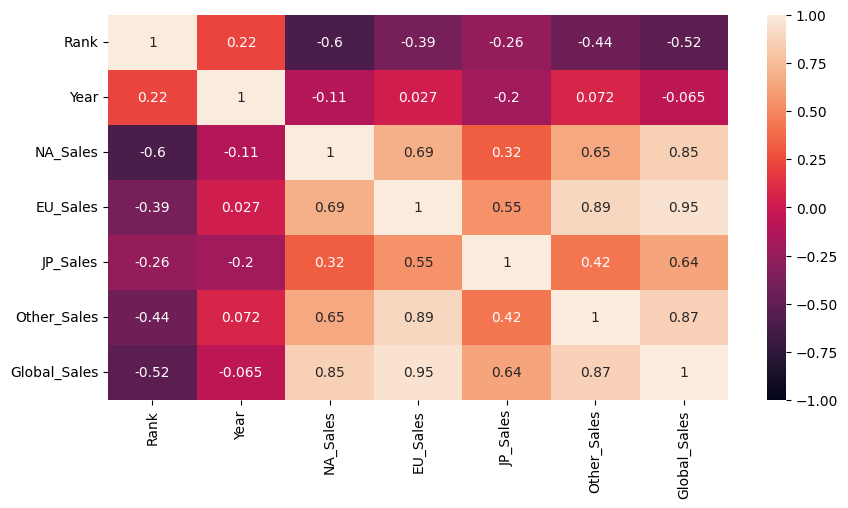

In [9]:
MyHeatMap = sns.heatmap(df[["Rank","Year","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].corr(), vmin=-1, vmax=1, annot=True) #аргумент annot=True отображает коэффициент корреляции
MyHeatMap.figure.set_figwidth(10)
MyHeatMap.figure.set_figheight(5) 

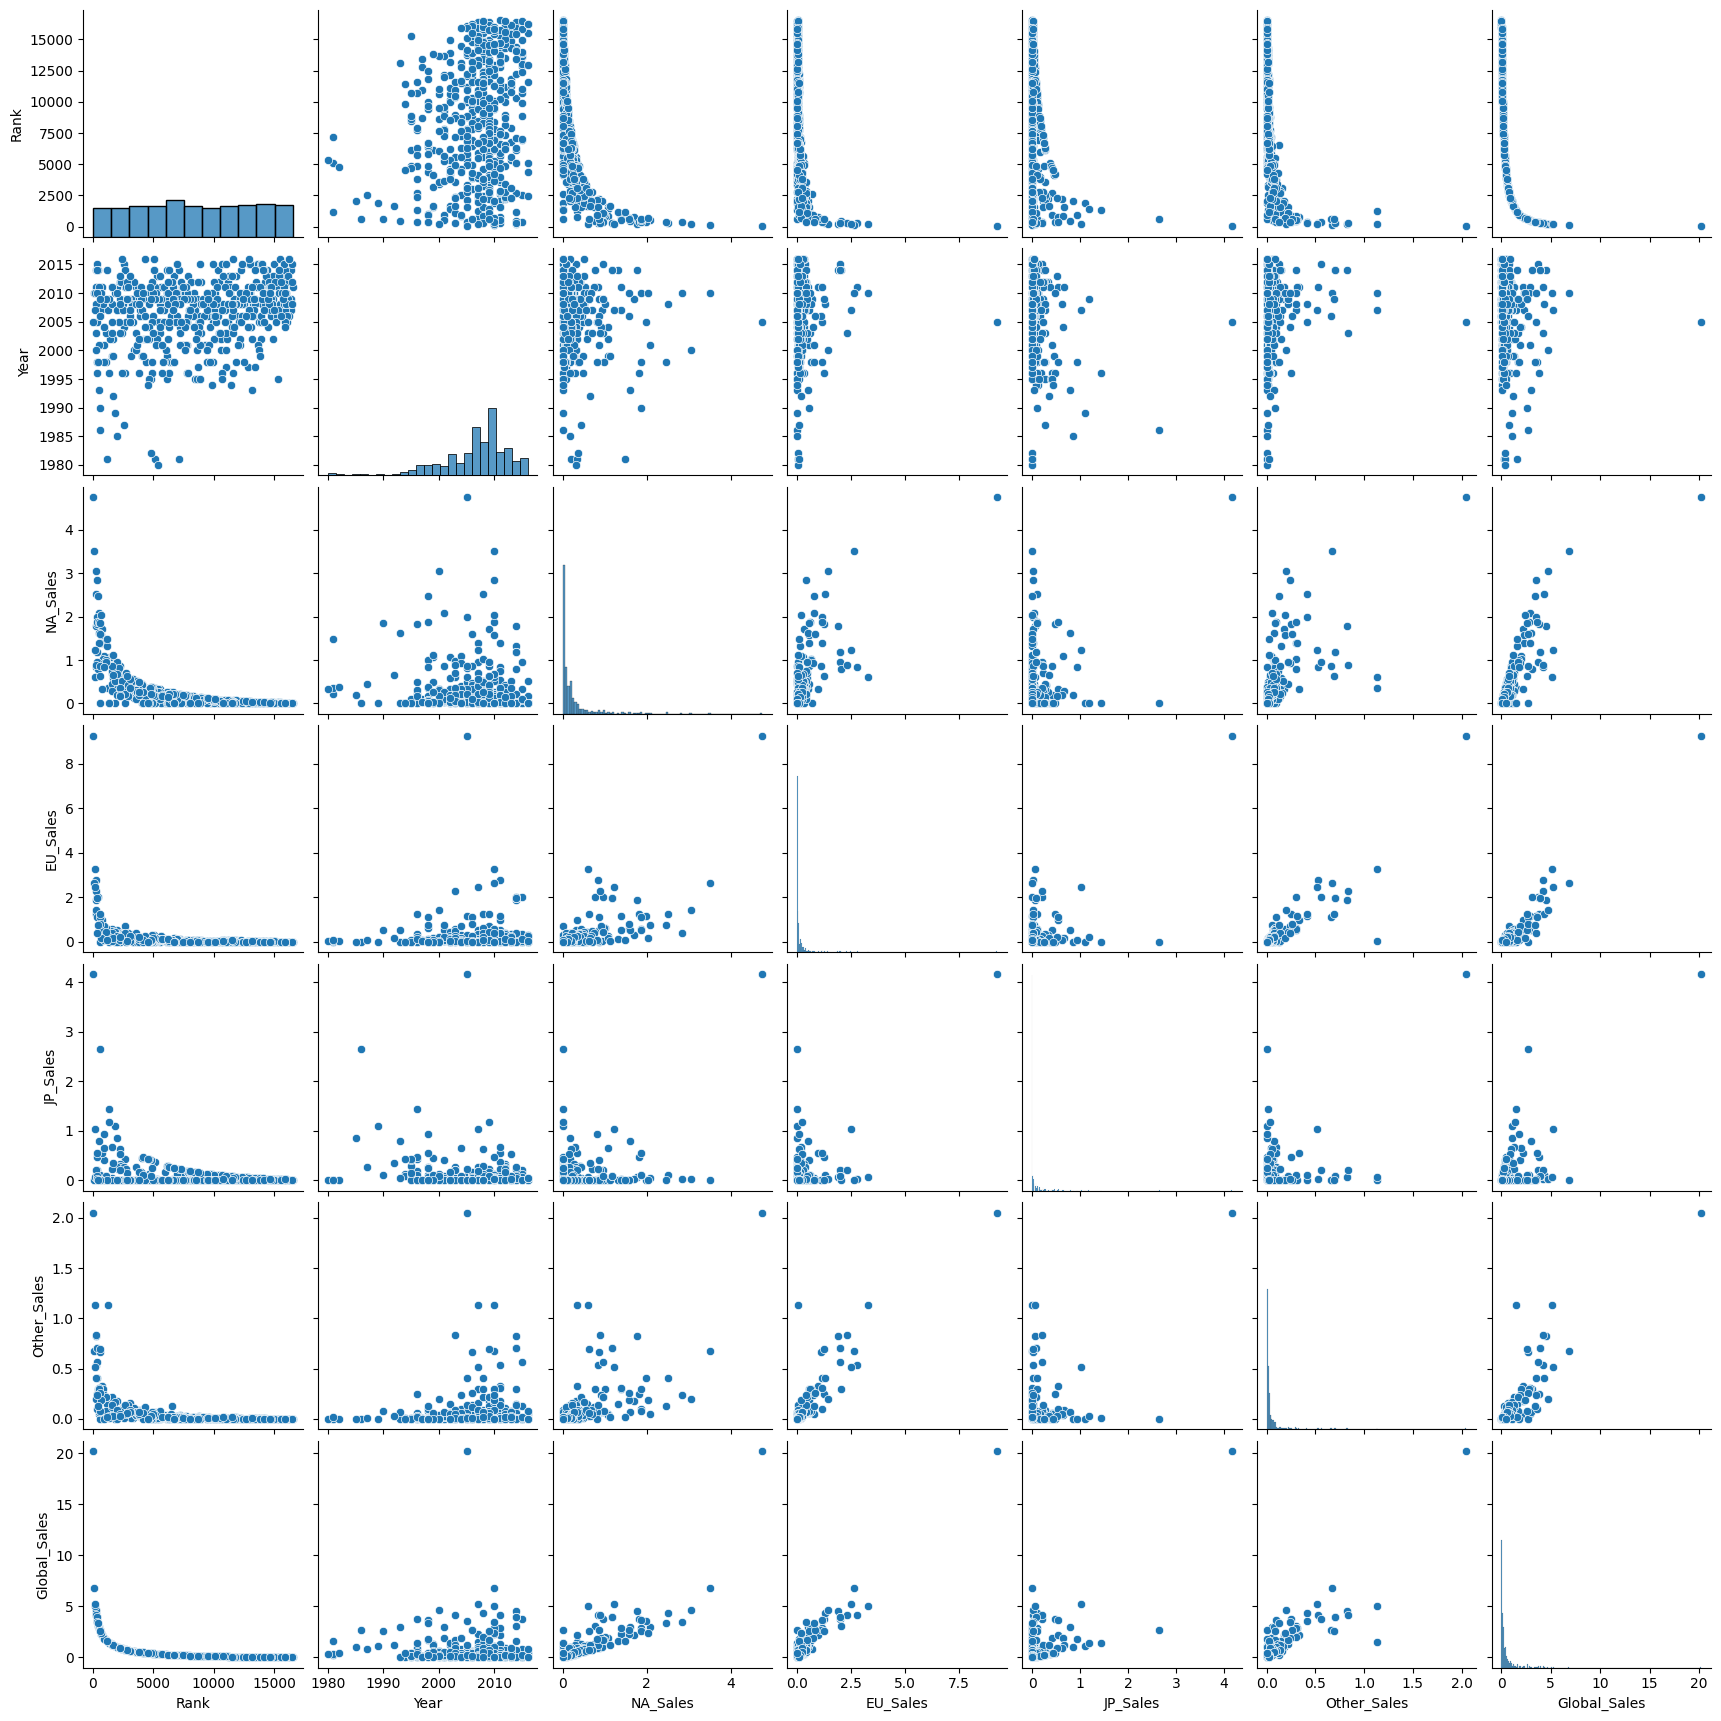

In [10]:
graph = sns.pairplot(df)

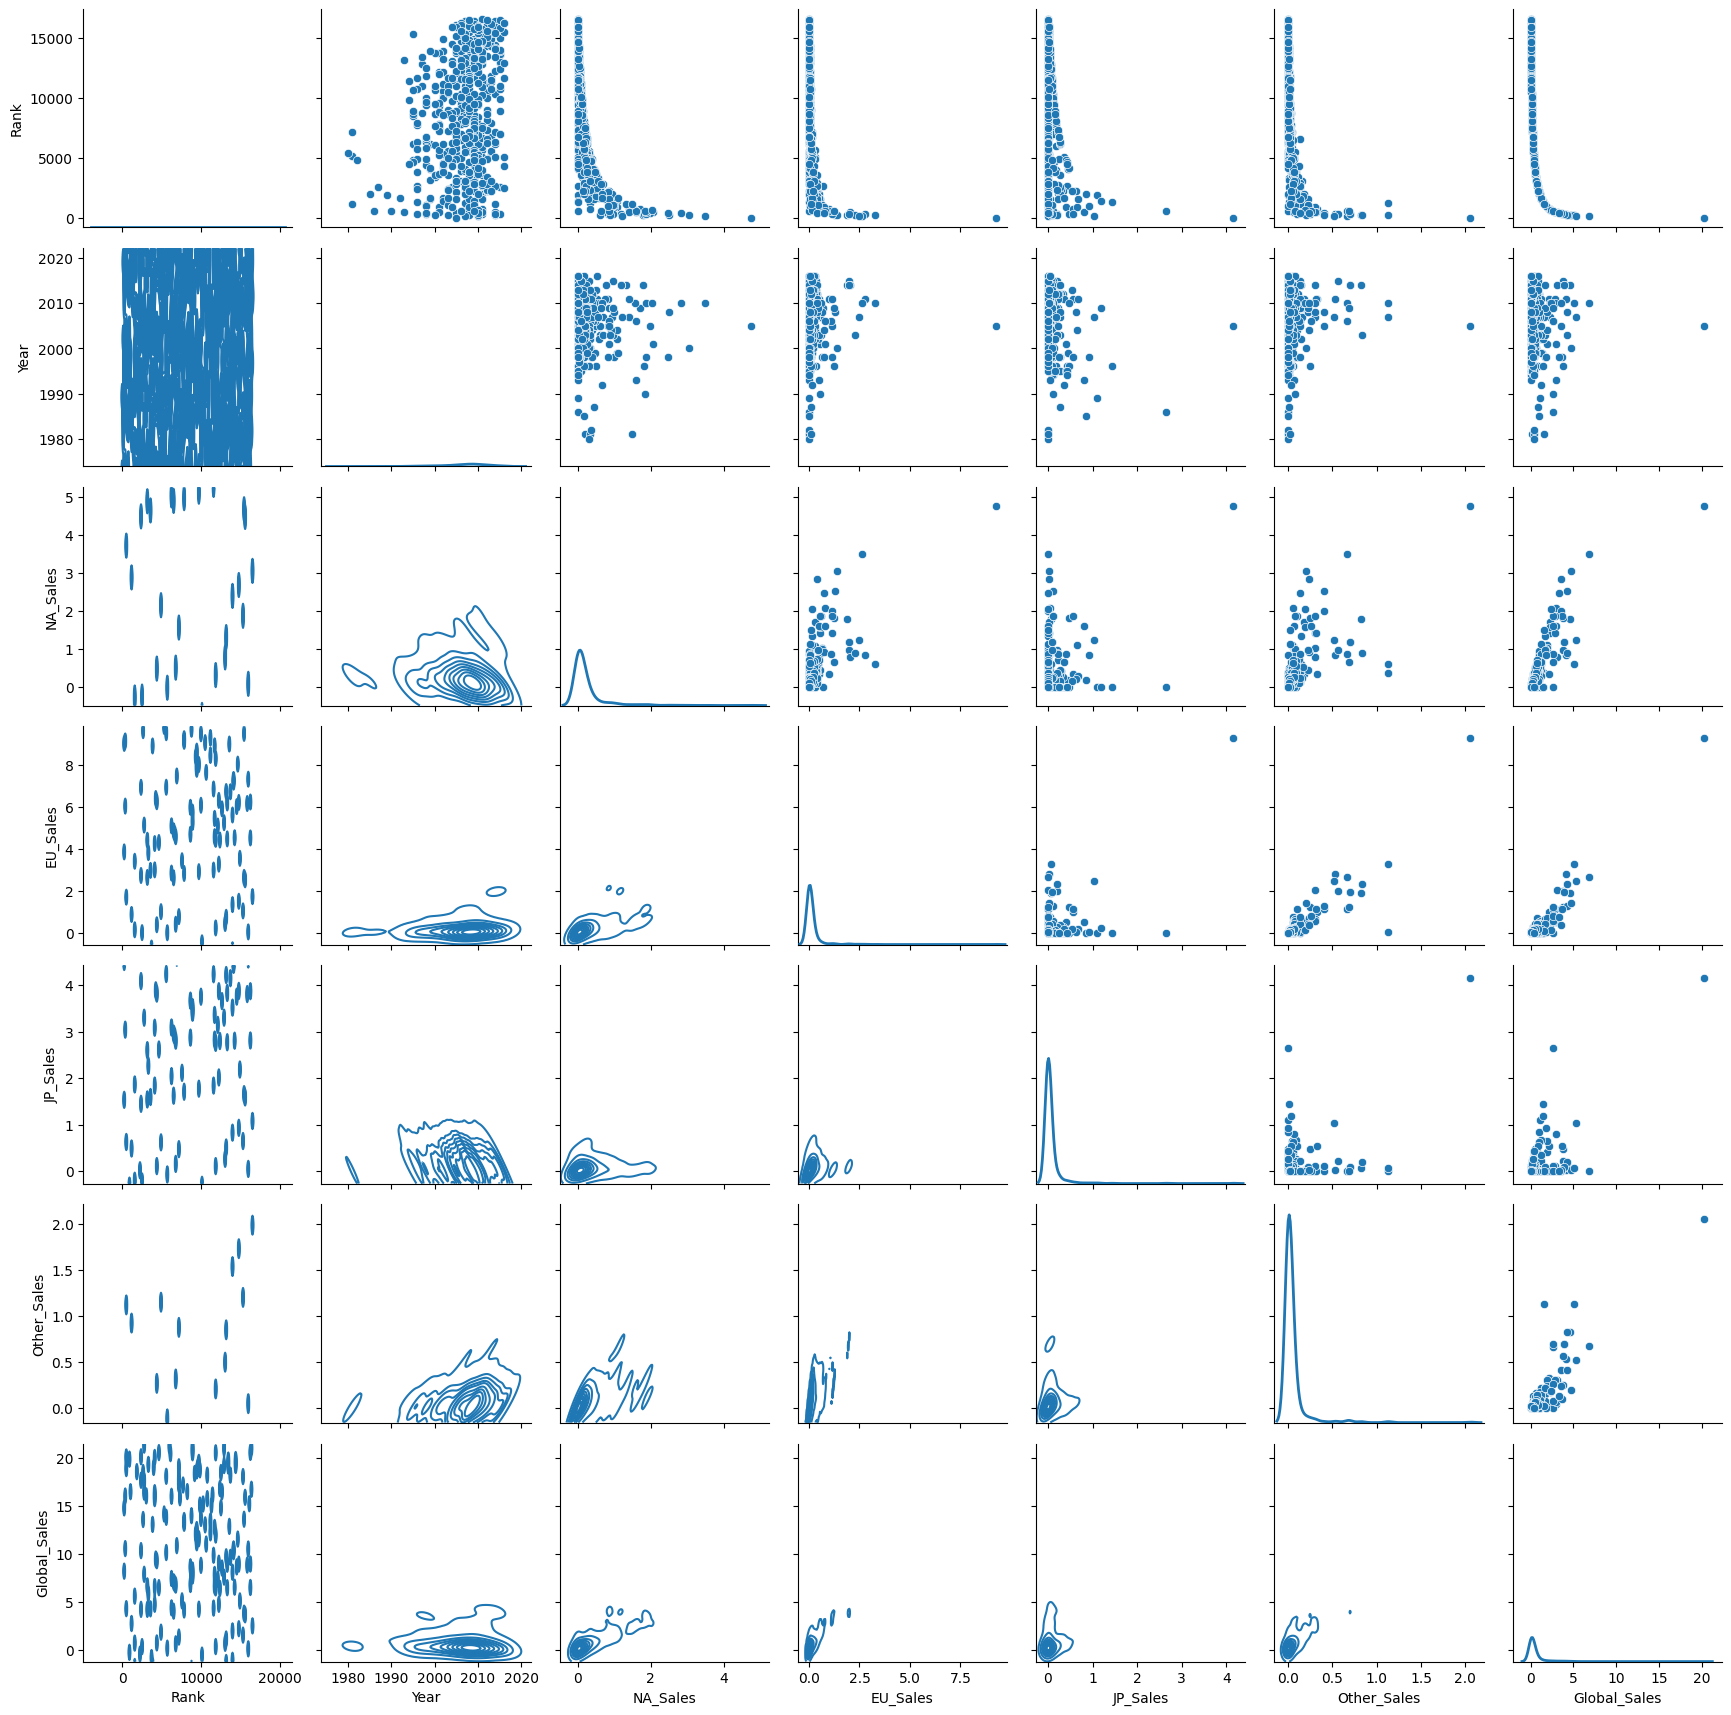

In [11]:
graph = sns.PairGrid(df)
graph = graph.map_upper(sns.scatterplot)
graph = graph.map_lower(sns.kdeplot)
graph = graph.map_diag(sns.kdeplot, lw = 2)

In [12]:
df_mini = df[["NA_Sales","EU_Sales","JP_Sales"]][::50]
df_mini

,NA_Sales,EU_Sales,JP_Sales
0,0.00,0.00,0.03
50,0.09,0.03,0.08
100,0.05,0.03,0.00
150,0.22,0.05,0.13
200,0.15,0.12,0.00
250,0.00,0.00,0.22
300,0.00,0.00,0.11
350,0.00,0.00,0.02
400,0.00,0.06,0.00
450,0.00,0.00,0.04


In [15]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)

model.fit(df_mini)

all_predictions = model.predict(df_mini)

df_mini["KMeans"] = all_predictions

df_mini

c:\Users\chva2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,NA_Sales,EU_Sales,JP_Sales,KMeans
0,0.00,0.00,0.03,1
50,0.09,0.03,0.08,1
100,0.05,0.03,0.00,1
150,0.22,0.05,0.13,2
200,0.15,0.12,0.00,2
250,0.00,0.00,0.22,0
300,0.00,0.00,0.11,0
350,0.00,0.00,0.02,1
400,0.00,0.06,0.00,1
450,0.00,0.00,0.04,1


<Axes: xlabel='count', ylabel='KMeans'>

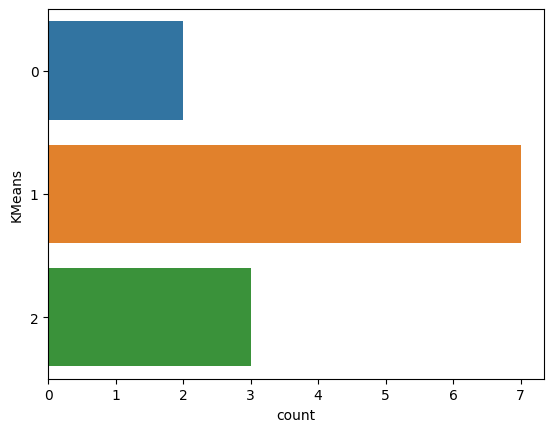

In [16]:
sns.countplot(data = df_mini, y = "KMeans")

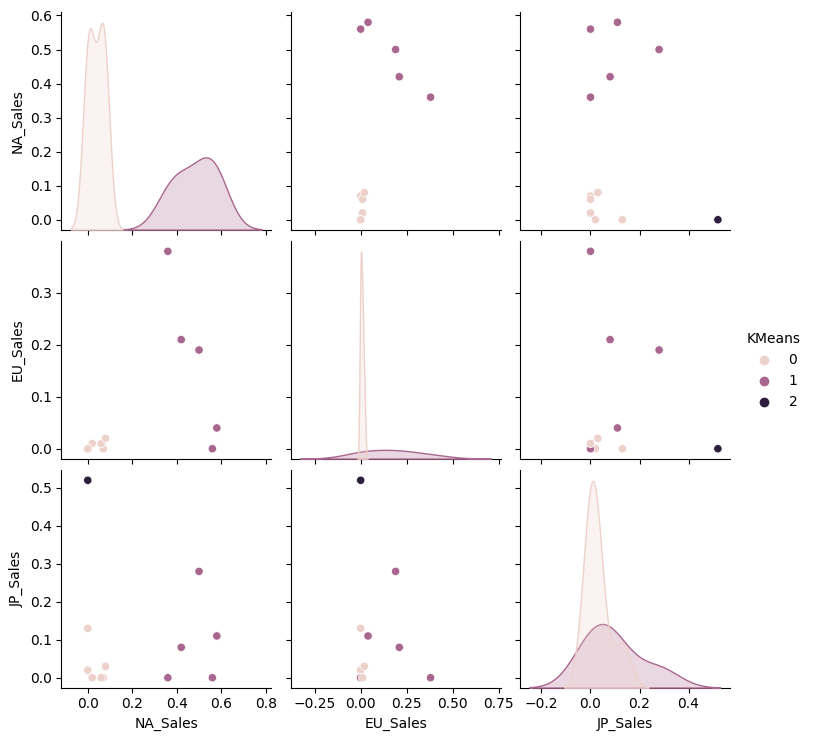

In [ ]:
sns.pairplot(df_mini,hue="KMeans")

In [ ]:
df_mini = df[["NA_Sales","EU_Sales","JP_Sales"]][::1]
df_mini

,NA_Sales,EU_Sales,JP_Sales
0,0.02,0.01,0.00
1,0.09,0.02,0.00
2,0.07,0.00,0.06
3,0.00,0.00,0.02
4,0.87,0.38,0.00
...,...,...,...
548,0.00,0.00,0.03
549,0.10,0.03,0.00
550,0.36,0.38,0.00
551,0.23,0.06,0.00


In [17]:
from sklearn.cluster import DBSCAN

model = DBSCAN()

model.fit(df_mini)

df_mini["DBSCAN"] = model.labels_

df_mini

,NA_Sales,EU_Sales,JP_Sales,KMeans,DBSCAN
0,0.00,0.00,0.03,1,0
50,0.09,0.03,0.08,1,0
100,0.05,0.03,0.00,1,0
150,0.22,0.05,0.13,2,-1
200,0.15,0.12,0.00,2,-1
250,0.00,0.00,0.22,0,-1
300,0.00,0.00,0.11,0,-1
350,0.00,0.00,0.02,1,0
400,0.00,0.06,0.00,1,0
450,0.00,0.00,0.04,1,0


<Axes: xlabel='count', ylabel='DBSCAN'>

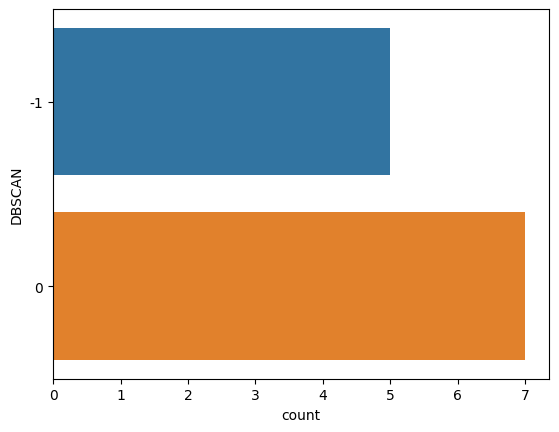

In [18]:
sns.countplot(data = df_mini, y = "DBSCAN")

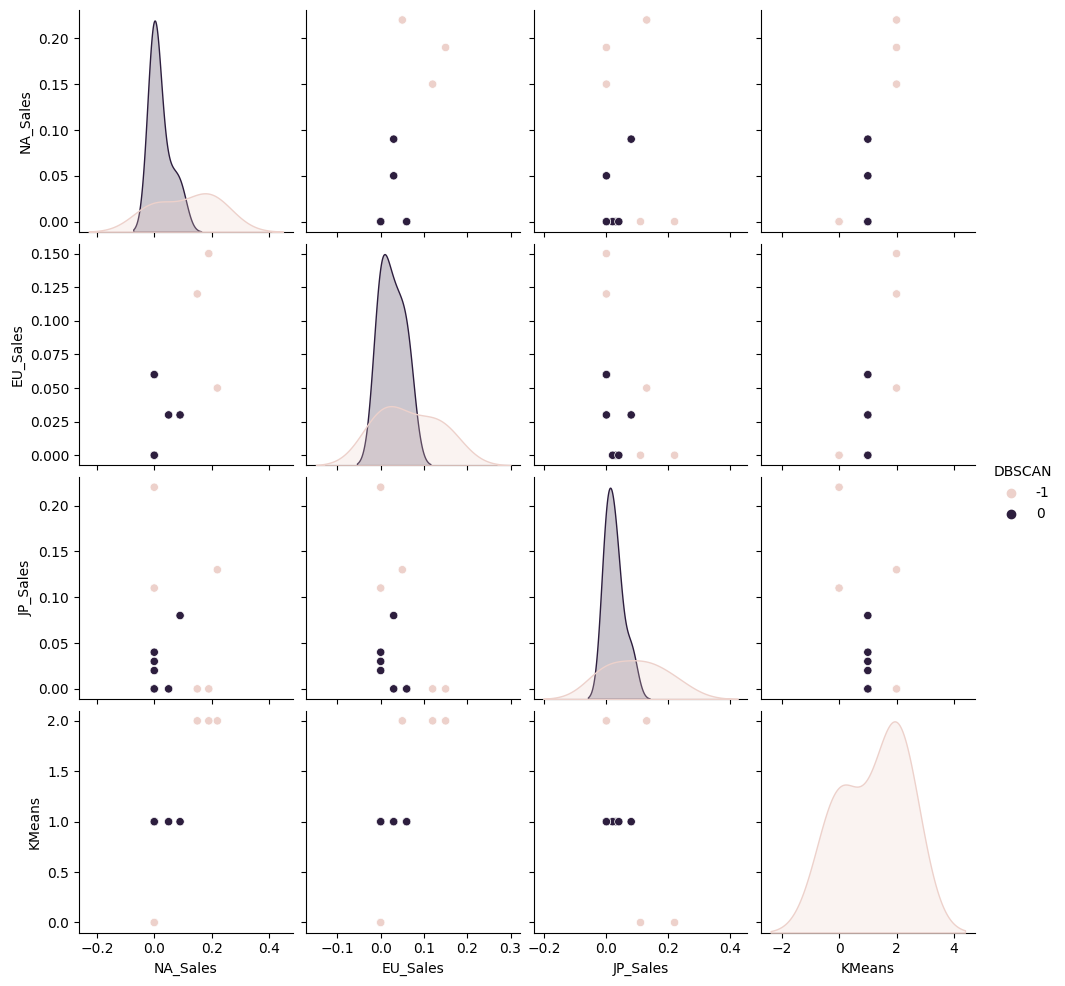

In [19]:
sns.pairplot(df_mini[::1],hue="DBSCAN")